In [ ]:
"""
requirements:
    tensorflow: 2.4.1
    numpy: 1.19.5
    keras: 2.4.3
    pandas: 1.1.5
"""
import numpy as np
import pandas as pd
import tensorflow.keras as keras
import tensorflow as tf

In [ ]:
# 载入google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/SentimentAnalysis/corpus/5moods/train/usual_trainTrimed.csv')
Labels, Reviews = df['label'].astype('str'), df['review'].astype('str')

Labels[:5], Reviews[:5]

(0       angry
 1       happy
 2     neutral
 3     neutral
 4    surprise
 Name: label, dtype: object,
 0                   气死 姐姐 快二是 阵亡 吗 尼玛 一个半 小时 过去 也 没 上车
 1                妞妞 今天 又 承办 一个 发文 登记 文号 是 嘻 么 么 哒 晚安 哟
 2               还 值得注意 另 一个 事实 张鞠存 原有 一个 东溪 草堂 为 其 读书处
 3    这 在 前 华约 国家 尤其 是 东德 使用 的 首次 联合演习 期间 被 一些 北约组织 ...
 4                                                    上
 Name: review, dtype: object)

In [ ]:
# 打乱并分割数据集
from sklearn.model_selection import train_test_split

# random_state表示随机数种子
Labels_train, Labels_test, Reviews_train, Reviews_test = train_test_split(
    Labels, Reviews, 
    test_size=0.3, random_state=0
)
Labels_train[:5], Reviews_train[:5]

(9806        happy
 2206     surprise
 10048     neutral
 13965       happy
 16766       angry
 Name: label, dtype: object,
 9806                累死 活动 结束 哈哈 洗澡 睡觉 咯 玩命 速递 好好看 奥迪 好帅 晚安
 2206          在 安静 的 环境 下 闭眼 感受 一种 灯光 从亮 到 暗到 黑 一种 奇怪 的 感觉
 10048    接上 读书 分享 中 班级 热爱 读书 的 同学 分享 最近 读书 的 心得 并 为 班级 ...
 13965    写 完 东西 到 阳台 看看 睡莲 缸 里 的 小龟 哈哈 龟 原来 是 睡觉 的 闭 眼睛 好萌
 16766                                           人 竖 中指 好 吗
 Name: review, dtype: object)

In [ ]:
"""
Tokenize words
String to INT
"""

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# 最长评论长度
# 此处有其他的处理方法：因为可能存在部分review过长，导致max_len很大
max_len = max(map(len, Reviews))

# Tokenize
tokenizer = Tokenizer()
tokenizer.fit_on_texts(Reviews_train)
reviews_train = tokenizer.texts_to_sequences(Reviews_train)
reviews_test = tokenizer.texts_to_sequences(Reviews_test)

# 查看结果
for text, vector in zip(Reviews_train[:3], reviews_train[:3]):
    print(text)
    print(vector)

# 固定长度
# 向量填充

reviews_train = pad_sequences(reviews_train, max_len)
reviews_test = pad_sequences(reviews_test, max_len)
max_len, len(reviews_train[0]), reviews_train[0], type(reviews_train)

累死 活动 结束 哈哈 洗澡 睡觉 咯 玩命 速递 好好看 奥迪 好帅 晚安
[1353, 621, 362, 382, 898, 109, 762, 7898, 20687, 3432, 7899, 5008, 182]
在 安静 的 环境 下 闭眼 感受 一种 灯光 从亮 到 暗到 黑 一种 奇怪 的 感觉
[4, 968, 1, 1201, 81, 2793, 423, 168, 3731, 20688, 21, 20689, 584, 168, 998, 1, 41]
接上 读书 分享 中 班级 热爱 读书 的 同学 分享 最近 读书 的 心得 并 为 班级 同学 推荐 有 意义 的 书籍 在 写作 方面 已 小有成就 的 胡仕林 同学 为 同学们 介绍 的 写作 经验 并 为 同学们 推荐 张德芬 的 都市 心灵 三部曲
[7900, 1673, 690, 50, 2471, 4517, 1673, 1, 432, 690, 100, 1673, 1, 9839, 133, 49, 2471, 432, 1611, 9, 946, 1, 7901, 4, 3433, 1166, 222, 20690, 1, 20691, 432, 49, 3213, 1543, 1, 3433, 899, 133, 49, 3213, 1611, 13249, 1, 7902, 2237, 20692]


(215,
 215,
 array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,  

In [ ]:
# mood to int and int to mood dict
mood_to_int = {
    'sad':0,
    'angry': 1,
    'fear': 2,
    'neutral': 3,
    'surprise': 4,
    'happy': 5,
}
int_to_mood = {k:i for k, i in enumerate(mood_to_int)}
print(int_to_mood)

{0: 'sad', 1: 'angry', 2: 'fear', 3: 'neutral', 4: 'surprise', 5: 'happy'}


In [ ]:
"""
one-hot编码label
"""
from tensorflow.keras import utils

labels_train = np.array([mood_to_int[x] for x in Labels_train], dtype=int)
labels_train = utils.to_categorical(labels_train) 
labels_test = np.array([mood_to_int[x] for x in Labels_test], dtype=int)
labels_test = utils.to_categorical(labels_test)
labels_train[:5], labels_test[:5]

(array([[0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 1.],
        [0., 1., 0., 0., 0., 0.]], dtype=float32),
 array([[0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0.],
        [1., 0., 0., 0., 0., 0.]], dtype=float32))

In [ ]:
"""
构建模型
"""

from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding, Dropout

vocabulary_size = len(tokenizer.word_index) + 1
print(vocabulary_size)

model = Sequential()

model.add(Embedding(input_dim=vocabulary_size, output_dim=32))
model.add(LSTM(16, return_sequences=False, dropout=0.5))
model.add(Dense(6, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

49083
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          1570656   
_________________________________________________________________
lstm_1 (LSTM)                (None, 16)                3136      
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 102       
Total params: 1,573,894
Trainable params: 1,573,894
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 训练
history = model.fit(
    reviews_train, labels_train, batch_size=32, epochs=10,
    validation_data=(reviews_test, labels_test)
)

Epoch 1/10
608/608 [==============================] - 53s 84ms/step - loss: 1.6079 - accuracy: 0.3263 - val_loss: 1.2523 - val_accuracy: 0.5263
Epoch 2/10
608/608 [==============================] - 51s 84ms/step - loss: 1.1600 - accuracy: 0.5726 - val_loss: 1.0975 - val_accuracy: 0.5993
Epoch 3/10
608/608 [==============================] - 51s 84ms/step - loss: 0.9675 - accuracy: 0.6576 - val_loss: 1.0080 - val_accuracy: 0.6356
Epoch 4/10
608/608 [==============================] - 51s 84ms/step - loss: 0.8557 - accuracy: 0.6953 - val_loss: 0.9790 - val_accuracy: 0.6459
Epoch 5/10
608/608 [==============================] - 51s 84ms/step - loss: 0.7784 - accuracy: 0.7232 - val_loss: 1.0018 - val_accuracy: 0.6499
Epoch 6/10
608/608 [==============================] - 51s 84ms/step - loss: 0.7355 - accuracy: 0.7457 - val_loss: 0.9601 - val_accuracy: 0.6671
Epoch 7/10
608/608 [==============================] - 51s 85ms/step - loss: 0.6695 - accuracy: 0.7720 - val_loss: 0.9798 - val_accuracy:

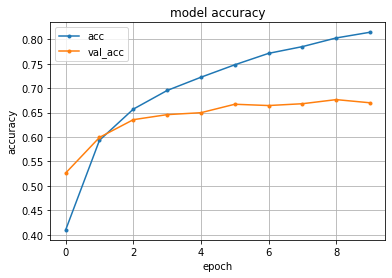

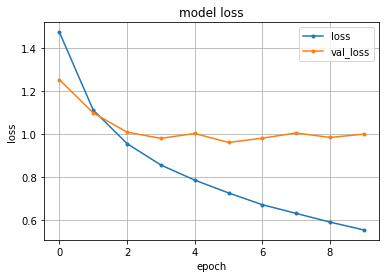

In [ ]:
from matplotlib import pyplot as plt

# 精度
plt.plot(history.history['accuracy'], marker='.', label='acc')
plt.plot(history.history['val_accuracy'], marker='.', label='val_acc')
plt.title('model accuracy')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(loc='best')
plt.show()

# loss
plt.plot(history.history['loss'], marker='.', label='loss')
plt.plot(history.history['val_loss'], marker='.', label='val_loss')
plt.title('model loss')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc='best')
plt.show()

In [ ]:
# 模型测试
input_text = ["小席 是 我 的 女儿"]
input_text = tokenizer.texts_to_sequences(input_text)
input_text = pad_sequences(input_text, maxlen=max_len)
pre = model.predict(input_text)
pre_ans = pre.argmax()
print(pre_ans, int_to_mood[pre_ans])

4 surprise
